#Logistic regression


• Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

• It is used for predicting the categorical dependent variable using a given set of independent variables.

• Logistic regression predicts the output of a categorical dependent variable.

• Therefore the outcome must be a categorical or discrete value.

• It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

In [16]:
%matplotlib inline

In [17]:
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import scipy.special
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

Spider data from *Suzuki et al. (2006)*:

In [18]:
df = pd.read_csv("logreg.csv")
print(df.head())


   Grain size (mm)  Spiders
0            0.245   absent
1            0.247   absent
2            0.285  present
3            0.299  present
4            0.327  present


This code will display the first few rows of your DataFrame, giving you a glimpse of the data structure and the values it contains.

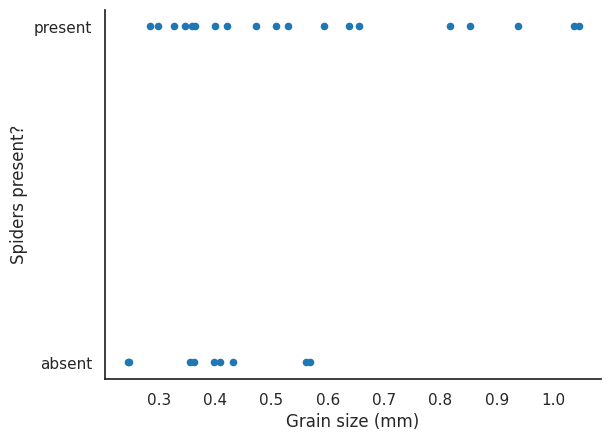

In [19]:
df.plot.scatter(x='Grain size (mm)', y='Spiders')
plt.ylabel('Spiders present?')
sns.despine()


This code snippet creates a scatter plot to visualize the relationship between the 'Grain size (mm)' feature and the presence of spiders. It utilizes the plot.scatter() function from pandas DataFrame to generate the scatter plot, with 'Grain size (mm)' on the x-axis and 'Spiders' on the y-axis. The plt.ylabel() function from Matplotlib is used to label the y-axis as 'Spiders present?'. Additionally, the sns.despine() function from Seaborn is called to remove the top and right spines from the plot, resulting in a cleaner visualization. This plot aids in understanding any potential correlation or pattern between the grain size and the presence of spiders in the dataset.

In [20]:
import sklearn.linear_model

scikit-learn has a logisitic regression classifier which uses regularization. To eliminate regularization, we set the regularization parameter `C` to $10^{12}$.

In [21]:
import sklearn
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1e12, random_state=0)

X = df['Grain size (mm)'].values.reshape(-1, 1)

clf.fit(X, df['Spiders'])
print(clf.intercept_, clf.coef_)


[-1.64761964] [[5.12153717]]



In this code snippet, scikit-learn's logistic regression model (LogisticRegression) is employed to predict the presence of spiders based on a single feature, namely the 'Grain size (mm)'. First, the logistic regression model is instantiated with a large regularization strength (C=1e12) to minimize regularization effects, and a random state is set for reproducibility (random_state=0). Subsequently, the predictor variable X is prepared by extracting the 'Grain size (mm)' column from the DataFrame df and reshaping it into a 2D array to conform to scikit-learn's input requirements. The model is then trained using the fit method, where 'Grain size (mm)' serves as the predictor and the 'Spiders' column from the DataFrame is designated as the target variable. Finally, the intercept and coefficients of the trained logistic regression model are printed to the console, providing insights into the intercept (bias) and the impact of the 'Grain size (mm)' feature on the probability of spiders being present.

This is in agreement with the equation John reports:
$$
probability of spider presence = \frac{e^{-1.6476+5.1215(grain \; size)}}{(1+e^{-1.6476+5.1215(grain \; size)}}
$$


probability of spider presence
​
  represents the probability of spiders being present.
Grain size
Grain size represents the predictor variable, specifically the 'Grain size (mm)' feature.
The coefficients are as follows: the intercept term is -1.6476, and the coefficient for the 'Grain size (mm)' feature is 5.1215.
The logistic regression model predicts the probability of spiders being present based on the grain size feature. The exponential function 𝑒x (e power X)
  is used to transform the linear combination of the intercept and the product of the coefficient and the predictor variable into a probability value between 0 and 1, as required by logistic regression.

In [22]:
def plot_log_reg(x, y, data, clf, xmin=None, xmax=None, alpha=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    ax.scatter(data[x], data[y], color='black', zorder=20, alpha=alpha)
    if xmin is None:
        xmin = x.min()
    if xmax is None:
        xmax = x.max()
    X_test = np.linspace(xmin, xmax, 300)

    loss = scipy.special.expit(X_test * clf.coef_ + clf.intercept_).ravel()
    ax.plot(X_test, loss, linewidth=3)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    fig.tight_layout()
    sns.despine()
    return fig, ax


The plot_log_reg function facilitates the visualization of a logistic regression model's decision boundary in conjunction with a scatter plot of the data. Firstly, it accepts parameters such as the names of the predictor and target variables (x and y, respectively), the dataset (data), the trained logistic regression classifier (clf), and optional parameters for the range of predictor variable values (xmin and xmax). If an axis is not provided, it generates a new one.

The function then plots the data points as a scatter plot, using the specified predictor and target variables. It assigns a color of black to the data points with adjustable transparency (alpha). Next, it computes the logistic function, also known as the sigmoid function, which represents the decision boundary of the logistic regression model. This is achieved by applying the logistic function to a range of predictor variable values (X_test). The resulting curve is plotted on the same axis as the scatter plot.

Following this, the function sets appropriate labels for the x-axis and y-axis based on the predictor and target variable names. It also adjusts the layout of the figure for improved presentation and removes the spines from the plot to enhance clarity.

Finally, the function returns the figure and axis objects, allowing for further customization or additional plotting if needed. Overall, this function provides a concise and effective way to visualize the decision boundary of a logistic regression model and the distribution of the data points in a single plot.

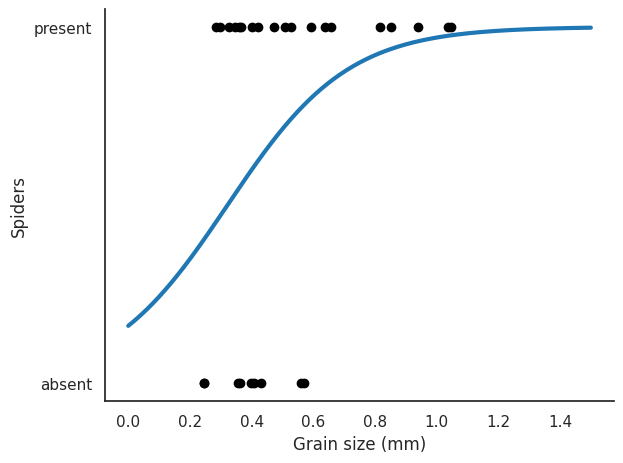

In [23]:
plot_log_reg(x='Grain size (mm)', y='Spiders', data=df, clf=clf, xmin=0, xmax=1.5);

The function call plots the decision boundary of the logistic regression model along with the scatter plot of the data points, using the specified predictor and target variables from the DataFrame df. The decision boundary visually represents the threshold at which the logistic regression model classifies instances into the two classes based on the predictor variable 'Grain size (mm)'.







# Hypothesis testing

To test if *Grain size* is a significant factor, we use the [**likelihood ratio test**](https://en.wikipedia.org/wiki/Logistic_regression#Evaluating_goodness_of_fit).

We calculate the likelihood of the model with the grain size (the alternative model):

In [24]:
def log_reg_null_model(y):
    clf = sklearn.linear_model.LogisticRegression(C=1e12)
    clf.fit(np.zeros_like(y).reshape(-1, 1), y)
    return clf

clf0 = log_reg_null_model(df['Spiders'])

The likelihood ratio test operates by calculating the test statistic $D$ from the likelihoods of the null and alternative models:
$$
D = -2 \log{ \frac{L(H_0)}{L(H_1)} }
$$
The test statistic is then approximately chisquare distributed.

*scikit-learn* has a log-loss function that can help us do that.
The log-loss is defined as the negative log-likelihood, so we can rewrite:
$$
D = 2 (-\log{L(H_0)} + \log{L(H_1)}) \Rightarrow \\
D = 2 (logloss(H_0) - logloss(H_1))
$$

In [25]:
import sklearn.metrics
from sklearn.preprocessing import LabelEncoder


In [26]:
def log_reg_lik_ratio_test(X, Y, clf0, clf1, df=1):
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    y_prob0 = clf0.predict_proba(X)
    loss0 = sklearn.metrics.log_loss(Y, y_prob0, normalize=False)
    y_prob1 = clf1.predict_proba(X)
    loss1 = sklearn.metrics.log_loss(Y, y_prob1, normalize=False)
    D = 2 * (loss0 - loss1)
    return scipy.stats.distributions.chi2.sf(D, df=df)


The function log_reg_lik_ratio_test performs a likelihood ratio test to compare the goodness-of-fit between two logistic regression models. It takes as input the predictor variables (X), target variable (Y), and two trained logistic regression classifiers (clf0 and clf1) representing the models being compared. The function calculates the log loss of each model when predicting the target variable from the provided predictor variables. The difference in log loss between the two models is then used to compute a test statistic, which follows a chi-squared distribution with degrees of freedom specified by the df parameter. Finally, the function computes the p-value of the likelihood ratio test using the chi-squared survival function from SciPy. This p-value indicates the probability of observing a test statistic as extreme as the computed value under the null hypothesis that the two models are equally good fits to the data. Thus, the function enables statistical evaluation of the relative performance of two logistic regression models in terms of their ability to predict the target variable based on the provided predictor variables.

In [27]:
label_encoder = LabelEncoder()
df['Spiders_encoded'] = label_encoder.fit_transform(df['Spiders'])


In [28]:
X = df['Grain size (mm)'].values.reshape(-1, 1)
log_reg_lik_ratio_test(X, df['Spiders_encoded'], clf0, clf)

0.03324376680911948


In this code snippet, you're preparing the predictor variable X by extracting the 'Grain size (mm)' column from the DataFrame df and reshaping it into a 2D array to fit the requirements of scikit-learn's logistic regression model. Then, you're calling the log_reg_lik_ratio_test function to perform a likelihood ratio test to compare the goodness-of-fit between two logistic regression models.

John indeed reports 0.033.

Note that the log-loss calculation in equivalent to:

In [29]:
probabilities = clf.predict_proba(df['Grain size (mm)'].values.reshape(-1, 1))

df['prob_absent'], df['prob_present'] = probabilities[:, 0], probabilities[:, 1]

df['Spiders'] = df['Spiders'] == 'present'

likelihood = (df.loc[df['Spiders'], 'prob_present'].prod() *
              df.loc[~df['Spiders'], 'prob_absent'].prod())

labels = [True, False]
log_loss_value = sklearn.metrics.log_loss(
    df['Spiders'],
    probabilities,
    labels=labels,
    normalize=False
)

print(-np.log(likelihood), log_loss_value)

15.315773911383223 15.315773911383223


This code computes the probabilities and evaluates the performance of a logistic regression model predicting spider presence based on grain size. It assigns probabilities to DataFrame columns, encodes the target variable, calculates likelihood, and computes log loss. Finally, it prints the negative log-likelihood and log loss values. This analysis assesses the model's ability to predict spider presence accurately.

## Second example

In [30]:
data = """Location	Latitude	Mpi90	Mpi100	p, Mpi100
Port Townsend, WA	48.1	47	139	0.748
Neskowin, OR	45.2	177	241	0.577
Siuslaw R., OR	44	1087	1183	0.521
Umpqua R., OR	43.7	187	175	0.483
Coos Bay, OR	43.5	397	671	0.628
San Francisco, CA	37.8	40	14	0.259
Carmel, CA	36.6	39	17	0.304
Santa Barbara, CA	34.3	30	0	0
"""
df = pd.read_table(io.StringIO(data))
df.head()

,Location,Latitude,Mpi90,Mpi100,"p, Mpi100"
0,"Port Townsend, WA",48.1,47,139,0.748
1,"Neskowin, OR",45.2,177,241,0.577
2,"Siuslaw R., OR",44.0,1087,1183,0.521
3,"Umpqua R., OR",43.7,187,175,0.483
4,"Coos Bay, OR",43.5,397,671,0.628


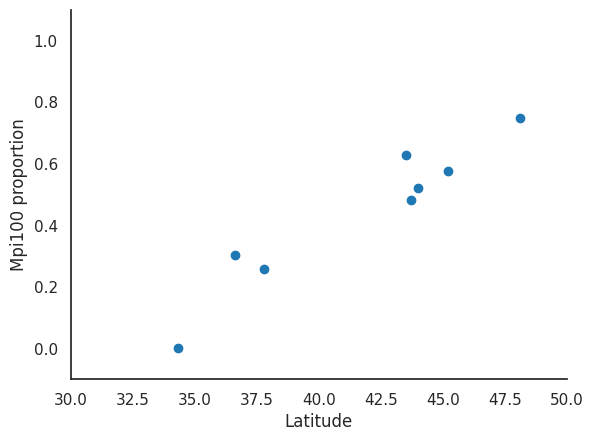

In [31]:
df.sort_values('Latitude').plot('Latitude', 'p, Mpi100', ls='', marker='o')
plt.ylabel('Mpi100 proportion')
plt.legend().set_visible(False)
plt.xlim(30, 50)
plt.ylim(-0.1, 1.1)
sns.despine()

In [32]:
rows = []
for i, row in df.iterrows():
    for _ in range(row['Mpi90']):
        rows.append({'Location':row['Location'], 'Latitude': row['Latitude'], 'Allele': 0})
    for _ in range(row['Mpi100']):
        rows.append({'Location':row['Location'], 'Latitude': row['Latitude'], 'Allele': 1})
raw_df = pd.DataFrame(rows)
raw_df.head()

,Location,Latitude,Allele
0,"Port Townsend, WA",48.1,0
1,"Port Townsend, WA",48.1,0
2,"Port Townsend, WA",48.1,0
3,"Port Townsend, WA",48.1,0
4,"Port Townsend, WA",48.1,0



This code snippet iterates over each row in the DataFrame df and generates new rows based on the values of the columns 'Mpi90' and 'Mpi100'. For each row, it creates multiple rows in a new DataFrame raw_df, where the number of rows generated depends on the values of 'Mpi90' and 'Mpi100'. Specifically, it generates rows with 'Allele' values of 0 and 1, with the number of rows for each allele determined by the corresponding values in 'Mpi90' and 'Mpi100'. The new DataFrame raw_df contains the expanded rows with additional columns for 'Location', 'Latitude', and 'Allele'. This process effectively expands the dataset to represent each allele count individually.

In [33]:
X = raw_df['Latitude'].values.reshape(-1, 1)
clf.fit(X, raw_df['Allele'])
print(clf.intercept_, clf.coef_)

[-7.64686599] [[0.17863979]]


which is very close to McDonald's intercept of -7.6469 and slope of 0.1786.

<Axes: xlabel='Latitude', ylabel='Allele'>

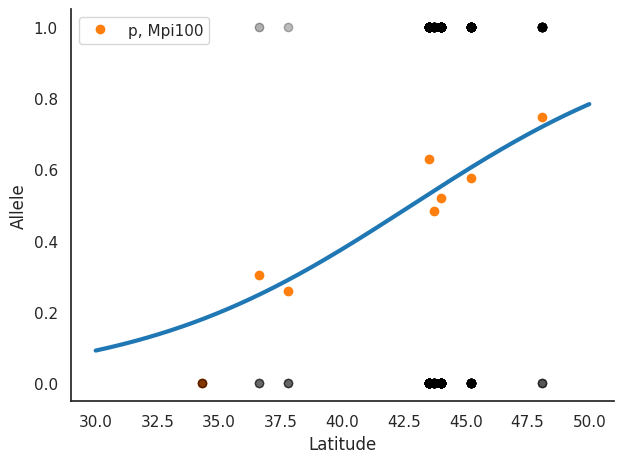

In [34]:
fig, ax = plot_log_reg(x='Latitude', y='Allele', data=raw_df, clf=clf, xmin=30, xmax=50, alpha=0.02)
df.sort_values('Latitude').plot('Latitude', 'p, Mpi100', ls='', marker='o', ax=ax)

This code provides a comprehensive visualization of the logistic regression model's decision boundary and the distribution of data points, aiding in the interpretation and evaluation of the model's performance.

In [35]:
clf0 = log_reg_null_model(raw_df['Allele'])
print(clf0.intercept_, clf0.coef_)

[0.19685285] [[0.]]



This code initializes a logistic regression model clf0, termed as a null model, which serves as a baseline for comparison with more complex models. The null model is established using the log_reg_null_model function, with the predictor variable being raw_df['Allele'], implying that the model might solely consider the 'Allele' feature. Following initialization, the code prints the intercept and coefficients of the null model. These parameters provide insights into the model's baseline characteristics: the intercept represents the bias term, while the coefficients indicate the relationship between the predictor variable(s) and the target variable. By establishing this null model, the code sets a foundation for evaluating the significance and performance of more elaborate models in explaining the variation in the target variable.

In [36]:
X = raw_df['Latitude'].values.reshape(-1, 1)
log_reg_lik_ratio_test(X, raw_df['Allele'], clf0, clf)

7.047578882585389e-20

This code segment conducts a likelihood ratio test to evaluate the improvement in model fit achieved by including the 'Latitude' feature in a logistic regression model compared to a null model. Firstly, it prepares the predictor variable 'Latitude' by extracting it from the DataFrame raw_df and reshaping it into a suitable format for analysis. Subsequently, the likelihood ratio test is initiated by invoking the log_reg_lik_ratio_test function with the predictor variable, the target variable 'Allele', and the two logistic regression classifiers: clf0, representing the null model, and clf, representing the model incorporating the 'Latitude' feature. This function computes a p-value indicating the significance of the difference in model fit between the two models. A low p-value suggests that the model with the additional 'Latitude' feature significantly improves fit over the null model. Thus, this test aids in determining the relevance and contribution of the 'Latitude' feature in explaining variation in the target variable 'Allele' within the logistic regression framework.